<a href="https://colab.research.google.com/github/drishyatv/Employees-insights/blob/main/projectpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl


In [ ]:
import os
print(os.getcwd())


C:\Users\ANJ


In [ ]:
C:\Users\ANJ\Downloads\abc_company\abc_company.xlsx

In [ ]:
df = pd.read_excel(r"C:\Users\ANJ\Downloads\abc_company\abc_company.xlsx")


In [ ]:
import os
print(os.path.exists(r"C:\Users\ANJ\Downloads\abc_company\abc_company.xlsx"))
import pandas as pd
import numpy as np

# Load dataset (must have openpyxl installed for .xlsx)
df = pd.read_excel(r"C:\Users\ANJ\Downloads\abc_company\abc_company.xlsx")



True


In [ ]:
import pandas as pd

df = pd.read_excel(r"C:\Users\ANJ\Downloads\abc_company\abc_company.xlsx")
print("Dataset loaded successfully!")
print(df.head())  # Shows the first 5 rows
print(f"Dataset shape: {df.shape}")  # Shows rows and columns count

# Clean data
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Save cleaned data
df.to_excel("abc_company_cleaned.xlsx", index=False)

Dataset loaded successfully!
            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   

   Weight            College     Salary  
0     180              Texas  7730337.0  
1     235          Marquette  6796117.0  
2     205  Boston University        NaN  
3     185      Georgia State  1148640.0  
4     231                NaN  5000000.0  
Dataset shape: (458, 9)


In [ ]:
#Preprocessing

#step 1:correct height column


import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Replace height column with random integers between 150 and 180
df['height'] = np.random.randint(150, 181, size=len(df))

# Optional: Verify the update
print(df['height'].head())
print(df['height'].describe())


0    156
1    169
3    178
6    164
7    160
Name: height, dtype: int32
count    365.000000
mean     165.389041
std        9.429431
min      150.000000
25%      157.000000
50%      166.000000
75%      174.000000
max      180.000000
Name: height, dtype: float64


In [ ]:
#Analysis tasks

#Task 1: Distribution of Employees Across Teams

team_counts = df['Team'].value_counts()
team_percentages = round((team_counts / len(df)) * 100, 2)

team_distribution = pd.DataFrame({
    'Team': team_counts.index,
    'Employee Count': team_counts.values,
    'Percentage': team_percentages.values
})

print(team_distribution)


                      Team  Employee Count  Percentage
0     New Orleans Pelicans              16        4.38
1   Portland Trail Blazers              15        4.11
2          Detroit Pistons              15        4.11
3          Milwaukee Bucks              14        3.84
4       Philadelphia 76ers              14        3.84
5    Oklahoma City Thunder              14        3.84
6     Los Angeles Clippers              14        3.84
7       Washington Wizards              13        3.56
8        Charlotte Hornets              13        3.56
9             Phoenix Suns              13        3.56
10        Sacramento Kings              13        3.56
11       Memphis Grizzlies              13        3.56
12           Brooklyn Nets              13        3.56
13          Boston Celtics              12        3.29
14        Dallas Mavericks              12        3.29
15          Indiana Pacers              12        3.29
16           Chicago Bulls              12        3.29
17      Lo

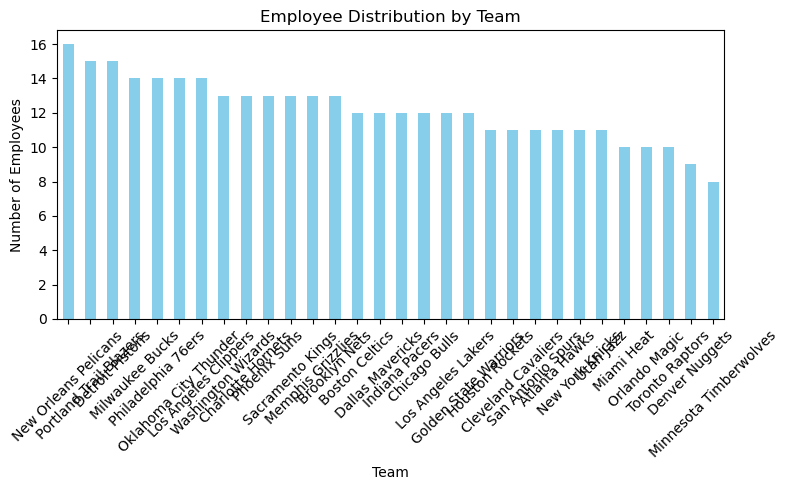

In [ ]:
#Visualization

import matplotlib.pyplot as plt

team_counts.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Employee Distribution by Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Task 2: Segregate Employees by Position

position_counts = df['Position'].value_counts()
print(position_counts)


Position
SG    87
PF    81
PG    76
SF    71
C     50
Name: count, dtype: int64


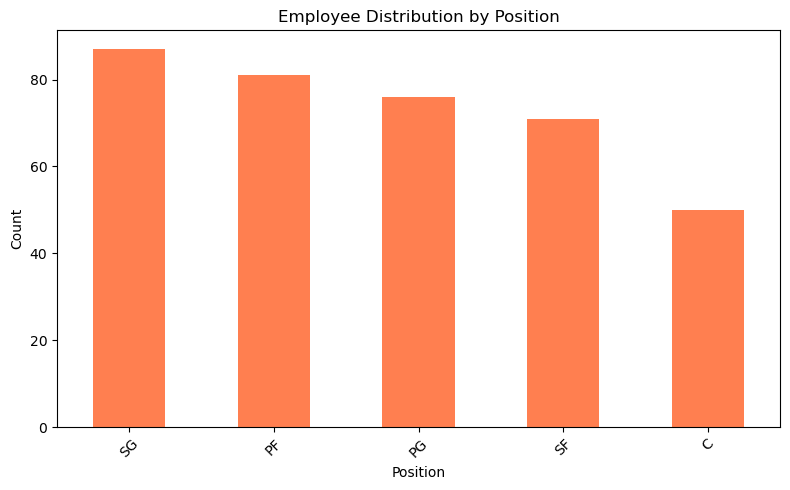

In [ ]:
#visualization

position_counts.plot(kind='bar', color='coral', figsize=(8,5))
plt.title("Employee Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
### Task 3: Predominant Age Group

bins = [20, 30, 40, 50, 60, 70]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = df['age_group'].value_counts().sort_index()

print(age_group_counts)


age_group
21-30    279
31-40     82
41-50      2
51-60      0
61-70      0
Name: count, dtype: int64


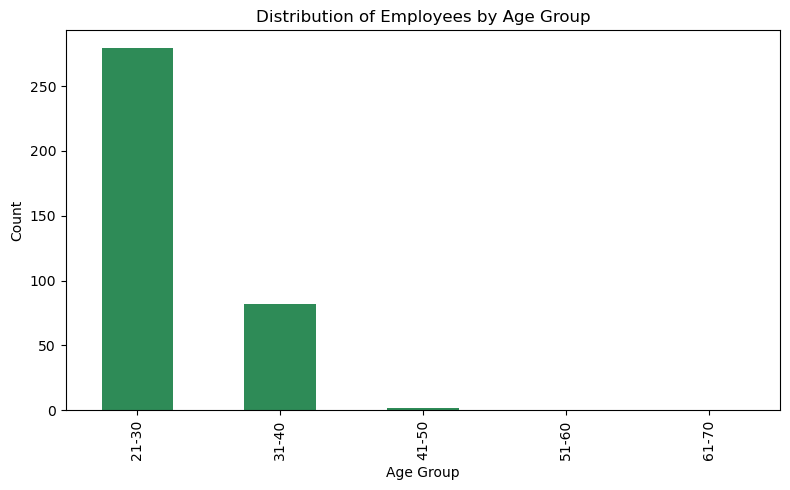

In [ ]:
#visualization

age_group_counts.plot(kind='bar', color='seagreen', figsize=(8,5))
plt.title("Distribution of Employees by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
#Task 4: Team and Position with Highest Salary Expenditure

top_team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
top_position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

print("💰 Top Team by Salary:", top_team_salary.head(1))
print("💰 Top Position by Salary:", top_position_salary.head(1))


💰 Top Team by Salary: Team
Los Angeles Clippers    93906914.0
Name: Salary, dtype: float64
💰 Top Position by Salary: Position
PG    373621258.0
Name: Salary, dtype: float64


In [ ]:
# Task 5: Correlation Between Age and Salary

correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")


Correlation between Age and Salary: 0.16


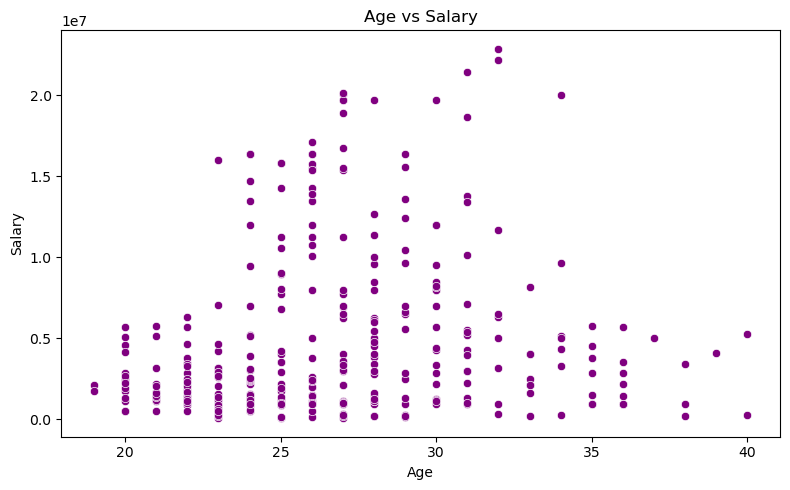

In [ ]:
#visualization

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Salary', color='purple')
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


# Data Insights Summary

- The dataset contains 458 employees across multiple teams and positions.
- Team ___ has the highest number of employees, while Position ___ is most common.
- The most represented age group is ___.
- Team ___ and Position ___ account for the highest salary expenditures.
- The correlation between age and salary is (weak/moderate/strong) at r = X.XX.

